In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Parameters
learning_rate = 0.01
training_steps = 1000
batch_size = 100
display_step = training_steps/10

# Network Parameters
n_input = 1     # input layer number of neurons
n_hidden_1 = 32 # 1st layer number of neurons
n_hidden_2 = 32 # 2nd layer number of neurons
n_output = 1    # output layer number of neurons

# Stochastic gradient descent optimizer.
# optimizer = tf.optimizers.SGD(learning_rate)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)

In [8]:
# Create model
def multilayer_perceptron(x):
    x = np.array([[[x]]],  dtype='float32')
    # Hidden fully connected layer with 32 neurons
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.sigmoid(layer_1)
    # Hidden fully connected layer with 32 neurons
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.sigmoid(layer_2)
    # Output fully connected layer
    output = tf.matmul(layer_2, weights['out']) + biases['out']
    return tf.keras.activations.linear(output)

# def f(x):
#     return x**3 ##+ 5.0

def f(x):
    return np.sin(x)

def g(x):
    return 2.0*x

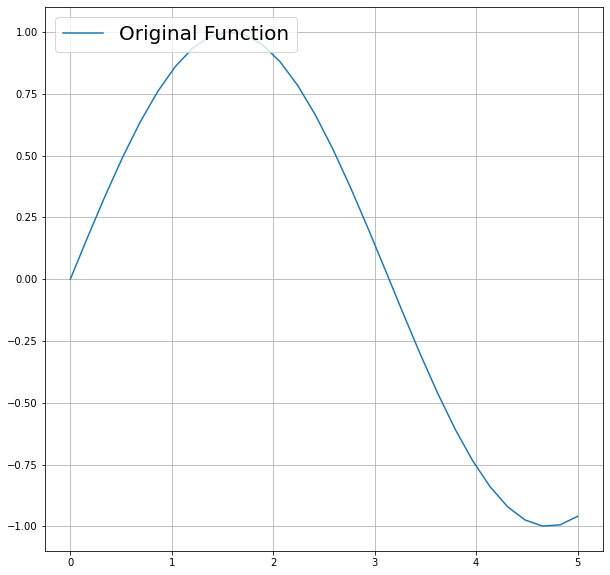

In [4]:
X = np.linspace(0,5,30)

plt.figure(figsize=(10,10))
vfunc = np.vectorize(f)

S = vfunc(X)

plt.plot(X, S, label="Original Function")
plt.grid('on')
plt.legend(loc=2, prop={'size': 20})
plt.show()

In [9]:
weights = {
    'h1': tf.Variable(tf.random.normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random.normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_hidden_2, n_output]))
}
biases = {
    'b1': tf.Variable(tf.random.normal([n_hidden_1])),
    'b2': tf.Variable(tf.random.normal([n_hidden_2])),
    'out': tf.Variable(tf.random.normal([n_output]))
}



def train_step_t(print_loss):
    with tf.GradientTape(persistent=True) as tape:
        summation = []
        for x in X: 
            x = tf.constant([[[x]]],  dtype='float32')
            tape.watch(x)
            summation.append(multilayer_perceptron(x) - f(x))
            # summation.append((multilayer_perceptron(x) - f(x))**2)
            # g_x = multilayer_perceptron(x)
            # dNN = tape.gradient(g_x, x)
            # summation.append(dNN - g(x))
        loss = tf.reduce_sum(tf.abs(summation)/30.0)
    if print_loss:
        print("loss: %f " % (loss))
    trainable_variables = list(weights.values()) + list(biases.values())
    gradients = tape.gradient(loss, trainable_variables)
    optimizer.apply_gradients(zip(gradients, trainable_variables))

for i in range(training_steps):
    # train_step_t()
    if i % display_step == 0:
        print(i), 
        print_loss = True
    else:
        print_loss = False
    
    train_step_t(print_loss) 


0
loss: 3.517438 
100
loss: 0.397549 
200
loss: 0.067452 
300
loss: 0.049534 
400
loss: 0.034249 
500
loss: 0.023151 
600
loss: 0.020379 
700
loss: 0.023243 
800
loss: 0.020376 
900
loss: 0.017095 


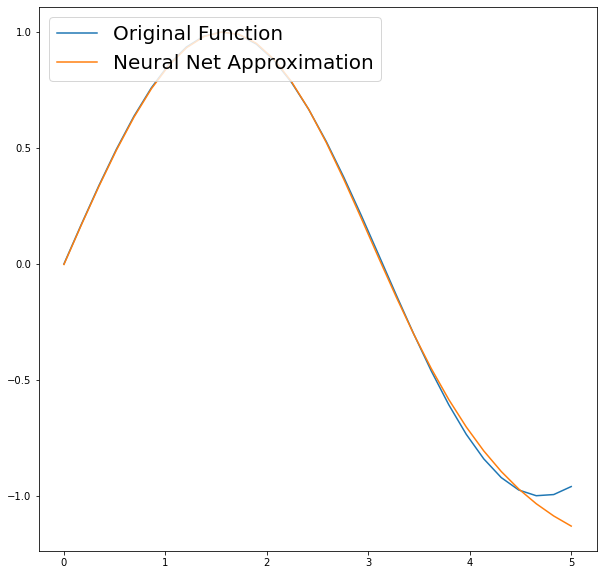

tf.Tensor([[[-0.20328593]]], shape=(1, 1, 1), dtype=float32)


In [10]:
plt.figure(figsize=(10,10))

result = []
result2 = []
for i in X:
  # result.append(f(i))
  result.append(multilayer_perceptron(i).numpy()[0][0][0])

plt.plot(X, S, label="Original Function")
plt.plot(X, result, label="Neural Net Approximation")
plt.legend(loc=2, prop={'size': 20})
plt.show()

print(multilayer_perceptron(-0.2))